In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data, DataLoader

In [19]:
#Dataprep:
data = []
current_group = []
with open('C:\\Users\\eliasak\\OneDrive - NTNU\\Master thesis\\07_ML\\TrussGNN\\dataset1\\dispz02.txt') as f:
    for line in f:
        if line.strip():  # If the line is not empty
            row = [float(x) for x in line.split()]
            current_group.append(row)
        else:  # If the line is empty
            if current_group:
                data.append(current_group)
                current_group = []




from scipy.optimize import curve_fit

def func(t, l, A, w, phi):
    return A * np.exp(-t*l) * np.sin(w * t - phi)

dt = 0.01
T = 5
x = np.arange(0,T,dt)

dataY = []
dp = []

for group in data:
    rowList = []
    for row in group:
        # Define initial guesses for the parameters
        initial_guess = [0.0001, 0.0001, 0.0001, 0.0001]
        # Fit the function to the data
        popt, pcov = curve_fit(func, x, row, p0=initial_guess, maxfev=10000)
        rowList.append([popt[0], popt[1], popt[2], popt[3]])
    dataY.append(rowList)

print(data[0])

'''
# Print the data to the console for testing
for group in data:
    for row in group:
        print(row)
    print()  # Print an empty line to separate the groups
'''


c:\Users\eliasak\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:486: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T
c:\Users\eliasak\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:900: RuntimeWarning: invalid value encountered in multiply
  pcov = pcov * s_sq


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

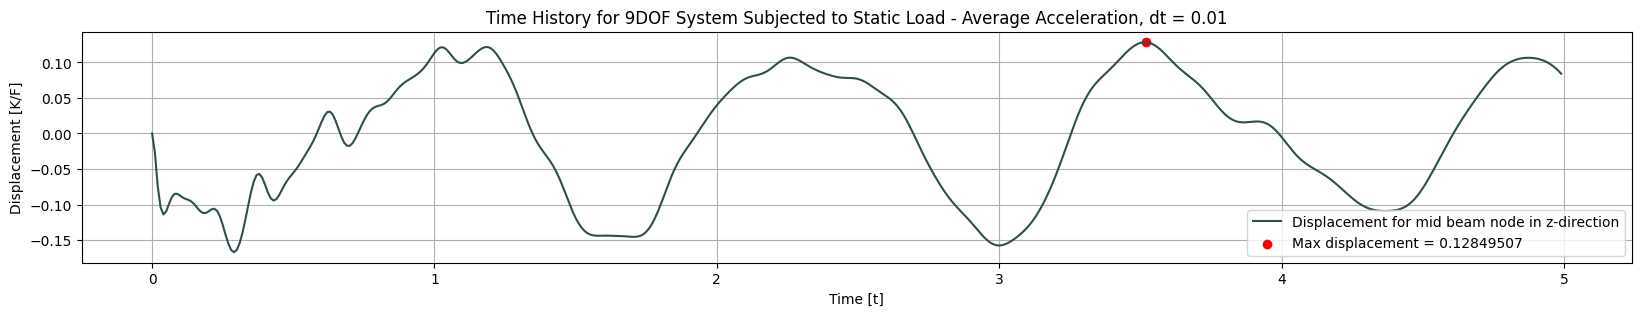

In [25]:
disp = data[6][26]
time = x

maxVal = np.max(disp)
minVal = np.min(disp)
maxInd = np.argmax(disp)
minInd = np.argmin(disp)
title = 'Time History for 9DOF System Subjected to Static Load - Average Acceleration, dt = '+str(dt)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(3)
plt.plot(time, disp, color='darkslategrey', label='Displacement for mid beam node in z-direction')
#plt.plot(x, func(x, *popt), 'r-', label='Fitted Function')
plt.scatter(time[maxInd], maxVal, color='red', label='Max displacement = '+str(round(maxVal,8)))
plt.xlabel('Time [t]')
plt.ylabel('Displacement [K/F]')
plt.grid()
plt.legend()
plt.title(title)
plt.show()

In [7]:
#Print data


print(dataY)

for i in range(len(dataY)):
    for j in range(len(dataY[i])):
        maxVal = np.max(dataY[i][j])
        minVal = np.min(dataY[i][j])
        maxInd = np.argmax(dataY[i][j])
        minInd = np.argmin(dataY[i][j])
        f = plt.figure()
        f.set_figwidth(20)
        f.set_figheight(3)
        
        plt.plot(x, data[i][j], color='darkslategrey', label='Displacement for mid beam node in z-direction')
        plt.plot(x, func(x, *dataY[i][j]), 'r-', label='Fitted Function')

        plt.xlabel('Time [t]')
        plt.ylabel('Displacement [K/F]')
        plt.grid()
        plt.legend()
        plt.title(title)
        plt.show()


[[[ 2.20531582e+001  6.25789224e+001  7.93917989e+003 -1.25430510e+004]
  [ 2.00500626e+001  4.91666872e+001  2.31100328e+002 -3.18578233e+002]
  [ 1.73278348e+001  3.61709190e+001  1.23319140e+004 -1.39380615e+004]
  [ 1.45821563e+001  2.51064375e+001  1.15482116e+004 -2.77130383e+004]
  [ 1.27272511e+001  1.68802391e+001  2.75497087e+003 -9.24033968e+003]
  [ 1.15721101e+001  1.07383146e+001  3.84300019e+002 -1.42233924e+003]
  [ 1.08084826e+001  6.10311102e+000  1.65820452e+004 -4.04110128e+004]
  [ 1.02749909e+001  2.76805231e+000  4.01704490e+003 -3.32669493e+004]
  [ 9.88779626e+000  7.10535292e-001 -2.48243130e+002 -1.10358609e+004]
  [ 2.66003630e-004  3.92996437e-171  3.82024895e-005  1.36303417e+000]]

 [[ 2.20531582e+001  6.25789224e+001  7.93917989e+003 -1.25430510e+004]
  [ 2.00500626e+001  4.91666872e+001  2.31100328e+002 -3.18578233e+002]
  [ 1.73278348e+001  3.61709190e+001  1.23319140e+004 -1.39380615e+004]
  [ 1.45821563e+001  2.51064375e+001  1.15482116e+004 -2.77130

In [ ]:
#Dataset generation